<a href="https://colab.research.google.com/github/huynhhoanghuy/MS_deeplearning_project_Multi-channel/blob/main/SentimentAnalysis_Multi-channel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thông tin học viên:
MSHV: 21C11011

Họ Tên: Huỳnh Hoàng Huy


---



- Chuẩn bị dữ liệu

In [286]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [287]:
!gdown 1hAHZI1vLdTBnye-6XTdPBvky8f4HwidL

Downloading...
From: https://drive.google.com/uc?id=1hAHZI1vLdTBnye-6XTdPBvky8f4HwidL
To: /content/IMDB Dataset.csv.zip
100% 27.0M/27.0M [00:00<00:00, 232MB/s]


In [288]:
!unzip "/content/IMDB Dataset.csv.zip"

Archive:  /content/IMDB Dataset.csv.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [289]:
import pandas as pd
data_pd = pd.read_csv("IMDB Dataset.csv")

data_pd["label"] = data_pd["sentiment"].map({'positive': 1, 'negative': 0})
data_pd.head()

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [290]:
data_pd["review"][6]

"I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gunsmoke were my hero's every week.You have my vote for a comeback of a new sea hunt.We need a change of pace in TV and this would work for a world of under water adventure.Oh by the way thank you for an outlet like this to view many viewpoints about TV and the many movies.So any ole way I believe I've got what I wanna say.Would be nice to read some more plus points about sea hunt.If my rhymes would be 10 lines would you let me submit,or leave me out to be in doubt and have me to quit,If this is so then I must go so lets do it."

Expand word.

Ex: I'll -> I will

In [291]:
!pip3 install contractions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [292]:
import contractions

data_pd['review'] = data_pd['review'].apply(lambda x: ' '.join([contractions.fix(word) for word in x.split()]))

Remove special letter

In [293]:
import re

data_pd['review'] = data_pd['review'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ',x) )

Remove single letter

In [294]:
data_pd['review'] = data_pd['review'].apply(lambda x: re.sub('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)', '', x) )

Lowercase

Ex: A->a

In [295]:
data_pd['review'] = data_pd['review'].apply(lambda x: x.lower())


Remove stop-word

In [296]:
import nltk


nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords.remove("not")
stopwords.remove("no")
print(stopwords)
data_pd['review'] = data_pd['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'theirs', 'hadn', 'just', 'whom', 'here', 'd', 'until', 'some', 'it', 'your', 'mustn', 'over', "mustn't", 'wasn', 'did', "didn't", 'against', "don't", 'ma', 'does', 'of', 'these', 'couldn', 'how', 't', 'than', "haven't", 'during', "won't", 'there', 'few', 'yours', 'where', 'hers', 'have', "aren't", 'won', 'further', 'itself', "mightn't", 'haven', 'most', 'can', 'i', 'while', 'themselves', 'were', 'hasn', 'below', 'been', 'll', 'our', 'but', 'between', 'or', 'once', 'only', "hasn't", "it's", 'down', 'his', 'to', 'in', 'didn', "weren't", 'yourself', 'herself', 'and', 'off', 'ourselves', 'don', 're', 'their', "that'll", 'those', 'my', 'above', 'a', "you'll", 'out', "you've", 'why', "should've", 'that', 'o', 've', 'had', 'same', 'this', 'because', 'on', 'into', "she's", 'has', 'myself', 'up', 'we', 'when', 'was', "shouldn't", 'its', 'who', 'they', "isn't", 'he', 'nor', 'h

In [297]:
data_pd.head()

,review,sentiment,label
0,one reviewers mentioned watching 1 oz episode ...,positive,1
1,wonderful little production br br filming tech...,positive,1
2,thought wonderful way spend time hot summer we...,positive,1
3,basically family little boy jake thinks zombie...,negative,0
4,petter mattei love time money visually stunnin...,positive,1


Tokenizer

In [298]:
from keras.preprocessing.text import Tokenizer
t = Tokenizer(num_words=5000)
# fit the tokenizer on the documents
t.fit_on_texts(data_pd["review"].values)


In [299]:
t.word_index

{'br': 1,
 'not': 2,
 'movie': 3,
 'film': 4,
 'one': 5,
 'like': 6,
 'would': 7,
 'good': 8,
 'no': 9,
 'time': 10,
 'even': 11,
 'story': 12,
 'really': 13,
 'see': 14,
 'well': 15,
 'much': 16,
 'could': 17,
 'bad': 18,
 'get': 19,
 'people': 20,
 'great': 21,
 'also': 22,
 'first': 23,
 'made': 24,
 'make': 25,
 'way': 26,
 'movies': 27,
 'characters': 28,
 'think': 29,
 'watch': 30,
 'character': 31,
 'films': 32,
 'two': 33,
 'many': 34,
 'seen': 35,
 'love': 36,
 'never': 37,
 'plot': 38,
 'life': 39,
 'acting': 40,
 'show': 41,
 'best': 42,
 'know': 43,
 'little': 44,
 'ever': 45,
 'man': 46,
 'better': 47,
 'end': 48,
 'scene': 49,
 'still': 50,
 'say': 51,
 'scenes': 52,
 'something': 53,
 'go': 54,
 'back': 55,
 'cannot': 56,
 'real': 57,
 'us': 58,
 'thing': 59,
 'watching': 60,
 'actors': 61,
 'though': 62,
 'director': 63,
 'old': 64,
 'years': 65,
 'funny': 66,
 'going': 67,
 '10': 68,
 'another': 69,
 'work': 70,
 'actually': 71,
 'nothing': 72,
 'makes': 73,
 'look': 7

In [300]:
X = t.texts_to_sequences(data_pd["review"].values)
y = data_pd["label"].values

In [301]:
X[0][:10]

[5, 1904, 927, 60, 193, 2930, 283, 3049, 103, 495]

In [302]:
from sklearn.model_selection import train_test_split
raw_X_train_val, raw_X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

from keras.preprocessing.sequence import pad_sequences
# X = pad_sequences(X,maxlen=400)
X_train_val = pad_sequences(raw_X_train_val,maxlen=400)
X_test = pad_sequences(raw_X_test,maxlen=400)

In [303]:

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

print (X_train.shape,X_test.shape, X_val.shape)

(20000, 400) (25000, 400) (5000, 400)


- Tạo model

In [304]:
import tensorflow.python.keras.backend as K
from keras.layers import Convolution1D, LSTM
from keras.layers import Dense, Dropout, Activation, Lambda, concatenate,Input,TimeDistributed,Flatten
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras import regularizers
from keras.initializers import constant



def max_1d(X):
  return K.max(X, axis=1)



In [305]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ModelCheckpoint

# set parameters:
max_features = 21540#14300
maxlen = 400
batch_size = 1024
embedding_dims = 200
nb_filter = 150
filter_length = 3
hidden_dims = 100
nb_epoch = 14


input_layer = Input(shape=(maxlen,),dtype='int32', name='main_input')
emb_layer = Embedding(max_features,embedding_dims)(input_layer)


# we add a Convolution1D, which will learn nb_filter
# word group filters of size 3:

con3_layer = Convolution1D(filters=nb_filter,kernel_size=3,padding='valid',activation='relu')(emb_layer)

pool_con3_layer = Lambda(max_1d, output_shape=(nb_filter,))(con3_layer)


# we add a Convolution1D, which will learn nb_filter
# word group filters of size 4:

con4_layer = Convolution1D(filters=nb_filter,kernel_size=5,padding='valid',activation='relu')(emb_layer)

pool_con4_layer = Lambda(max_1d, output_shape=(nb_filter,))(con4_layer)


# we add a Convolution1D, which will learn nb_filter
# word group filters of size 5:

con5_layer = Convolution1D(filters=nb_filter,kernel_size=7,padding='valid',activation='relu')(emb_layer)

pool_con5_layer = Lambda(max_1d, output_shape=(nb_filter,))(con5_layer)

cnn_layer = concatenate([pool_con3_layer, pool_con5_layer,pool_con4_layer ])


#LSTM


x = Embedding(max_features, embedding_dims, input_length=maxlen)(input_layer)
lstm_layer = LSTM(128)(x)

cnn_lstm_layer = concatenate([lstm_layer, cnn_layer])

dense_layer = Dense(hidden_dims*2, activation='relu', bias_initializer=constant(value=1.))(cnn_lstm_layer)
output_layer= Dropout(0.4)(dense_layer)

output_layer = Dense(1, trainable=True,activation='sigmoid',bias_initializer=constant(value=1.))(dense_layer)




model = Model(inputs=input_layer, outputs=output_layer)
#adadelta = Adadelta(learning_rate=0.01, rho=0.95, epsilon=1e-06)
def custom_loss_function(y_true, y_pred):
  squared_difference = tf.square(y_true - y_pred)
  return tf.reduce_mean(squared_difference, axis=-1)

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.004),
              metrics=['accuracy'])
mc = ModelCheckpoint("best_checkpoint_multi_channel.h5", monitor="val_accuracy" , save_best_only=True, save_weights_only=False)

print(model.summary())

history = model.fit(X_train,y_train,validation_data=(X_val,y_val), epochs= nb_epoch, batch_size=batch_size, callbacks=[mc])

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 400)]        0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 400, 200)     4308000     ['main_input[0][0]']             
                                                                                                  
 conv1d_15 (Conv1D)             (None, 398, 150)     90150       ['embedding_10[0][0]']           
                                                                                                  
 conv1d_17 (Conv1D)             (None, 394, 150)     210150      ['embedding_10[0][0]']           
                                                                                            

Vẽ chart để kiểm tra vấn đề underfit và overfit. Qua chart bên dưới ta thấy training tốt

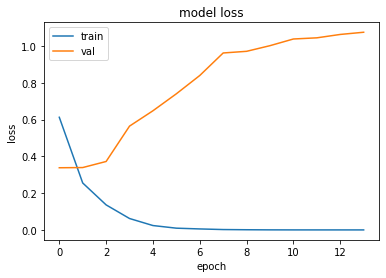

In [306]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

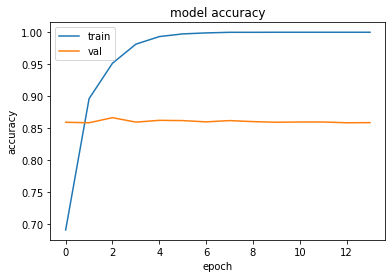

In [307]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Predict all test samples

In [308]:
model.load_weights("best_checkpoint_multi_channel.h5")
y_test_pred = model.predict(X_test)
y_test_pred = [1 if pred > 0.5 else 0 for pred in y_test_pred ]
import numpy as np
print("Acc:",(1 - np.sum(np.abs(y_test_pred- y_test))/len(y_test_pred)))

Acc: 0.86388


# Augmentation data

In [309]:
positive_seq = ". very like very love. do not hate"
negative_seq = ". do not like love. very hate"

pos_token = t.texts_to_sequences([positive_seq])
neg_token = t.texts_to_sequences([negative_seq])
pos_token[0]

[6, 36, 2, 604]

Duplicate the train_val data and augment.

Add positive_seq to the tail, the label will be 1

And vice versa...

In [310]:
pos_raw_X_train_val = raw_X_train_val.copy()
pos_y_train_val = y_train_val.copy()
for list_document in pos_raw_X_train_val:
  list_document.extend(pos_token[0])
for index in range(len(pos_y_train_val)):
  pos_y_train_val[index] = 1

neg_raw_X_train_val = raw_X_train_val.copy()
neg_y_train_val = y_train_val.copy()
for list_document in neg_raw_X_train_val:
  list_document.extend(neg_token[0])
for index in range(len(neg_y_train_val)):
  neg_y_train_val[index] = 0


Concat with new data

In [311]:
aug_raw_X_train_val = raw_X_train_val + pos_raw_X_train_val + neg_raw_X_train_val
aug_y_train_val = np.concatenate((y_train_val,pos_y_train_val,neg_y_train_val))

In [312]:
# positive_data_pd_copy = data_pd.copy()
# negative_data_pd_copy = data_pd.copy()


# positive_data_pd_copy['review'] = positive_data_pd_copy['review'].apply(lambda x: x + ". very like very love. do not hate")
# positive_data_pd_copy['sentiment'] = positive_data_pd_copy['sentiment'].apply(lambda x: "positive")
# positive_data_pd_copy['label'] = positive_data_pd_copy['label'].apply(lambda x: 1)


# negative_data_pd_copy['review'] = negative_data_pd_copy['review'].apply(lambda x: x + ". do not like love. very hate")
# negative_data_pd_copy['sentiment'] = negative_data_pd_copy['sentiment'].apply(lambda x: "negative")
# negative_data_pd_copy['label'] = negative_data_pd_copy['label'].apply(lambda x: 0)

# data_pd = data_pd.append(positive_data_pd_copy, ignore_index = True)
# data_pd = data_pd.append(negative_data_pd_copy, ignore_index = True)

# data_pd.tail()


In [313]:
from keras.preprocessing.sequence import pad_sequences
aug_raw_X_train_val = pad_sequences(aug_raw_X_train_val,maxlen=400)

In [314]:

X_train, X_val, y_train, y_val = train_test_split(aug_raw_X_train_val, aug_y_train_val, test_size=0.2, random_state=42, stratify=aug_y_train_val)

print (X_train.shape,X_test.shape, X_val.shape)

(60000, 400) (25000, 400) (15000, 400)


- Chạy lại model

In [320]:
from keras.layers import *
from keras.models import Model
from keras.callbacks import ModelCheckpoint

# set parameters:
max_features = 21540#14300
maxlen = 400
batch_size = 2048
embedding_dims = 200
nb_filter = 150
filter_length = 3
hidden_dims = 100
nb_epoch = 14


model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])
mc = ModelCheckpoint("aug_best_checkpoint_multi_channel.h5", monitor="val_accuracy" , save_best_only=True, save_weights_only=False)

print(model.summary())

history = model.fit(X_train,y_train,validation_data=(X_val,y_val), epochs= nb_epoch, batch_size=batch_size, callbacks=[mc])

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 400)]        0           []                               
                                                                                                  
 embedding_10 (Embedding)       (None, 400, 200)     4308000     ['main_input[0][0]']             
                                                                                                  
 conv1d_15 (Conv1D)             (None, 398, 150)     90150       ['embedding_10[0][0]']           
                                                                                                  
 conv1d_17 (Conv1D)             (None, 394, 150)     210150      ['embedding_10[0][0]']           
                                                                                            

Vẽ chart để kiểm tra vấn đề underfit và overfit. Qua chart bên dưới ta thấy training tốt

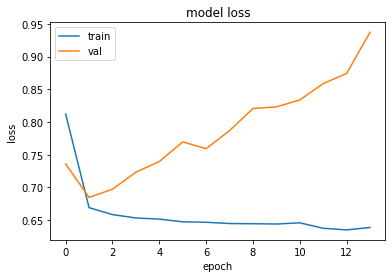

In [316]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

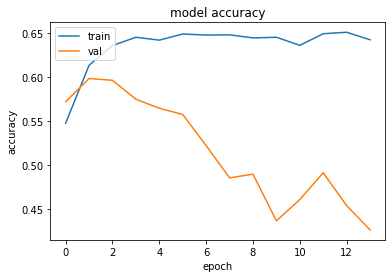

In [317]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Predict all test samples

In [318]:
model.load_weights("aug_best_checkpoint_multi_channel.h5")
y_test_pred = model.predict(X_test)
y_test_pred = [1 if pred > 0.5 else 0 for pred in y_test_pred ]
import numpy as np
print("Acc:",(1 - np.sum(np.abs(y_test_pred- y_test))/len(y_test_pred)))

Acc: 0.76644


In [319]:
0.8750 - 0.88656


-0.011560000000000015

Kết thúc!

---




